# Data Exploration Sandbox

This is a temporary file. It is for some quick data exploration and graphing.

In [1]:
suppressPackageStartupMessages(
    {suppressWarnings({
        library(tidyverse)
        library(repr)
        library(tidymodels)
        library(tidyr)
        library(ggplot2)        
        library(scales)
        library(patchwork) 
        library(purrr)
        library(dplyr)
        library(GGally)
        library(ISLR)
    })
})

In [2]:
options(repr.plot.width = 9, repr.plot.height = 7, repr.matrix.max.rows = 7,readr.show_col_types = FALSE)

player_data <- read_csv("https://raw.githubusercontent.com/FabianoGLentini/player-subscription-ml/refs/heads/main/data/players.csv")


In [3]:
# Wrangle fist pass
player_df <- player_data |> # TODO must consider reworking a joining of some labels in gender etc due to low representaions
            select( subscribe, gender, played_hours, experience, Age) |>
            drop_na() |>
            mutate(
                subscribe = as_factor(subscribe),  # lgl -> fct for analysis and modeling
                gender = as_factor(gender),        # chr -> fct for analysis and modeling
                played = factor(as.logical(played_hours)),
                experience = as_factor(experience) # chr -> fct for analysis and modeling
            )  |>
             mutate(gender = fct_recode(gender, # Aggregate some of the gender to balance out count and avoid missclassification due to underepresented categories
                                    "Non-binary/Other" = "Agender",
                                    "Non-binary/Other" = "Non-binary",
                                     "Non-binary/Other" = "Two-Spirited",
                                    "Non-binary/Other" = "Other"
                                      ))

player_df

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `gender = fct_recode(...)`.
Caused by warning:
! Unknown levels in `f`: Other”


subscribe gender            played_hours experience Age played
1   TRUE      Male              30.3         Pro         9  TRUE  
2   TRUE      Male               3.8         Veteran    17  TRUE  
3   FALSE     Male               0.0         Veteran    17  FALSE 
4   TRUE      Female             0.7         Amateur    21  TRUE  
⋮   ⋮         ⋮                 ⋮            ⋮          ⋮   ⋮     
192 FALSE     Male              0.3          Veteran    22  TRUE  
193 FALSE     Prefer not to say 0.0          Amateur    57  FALSE 
194 FALSE     Male              2.3          Amateur    17  TRUE

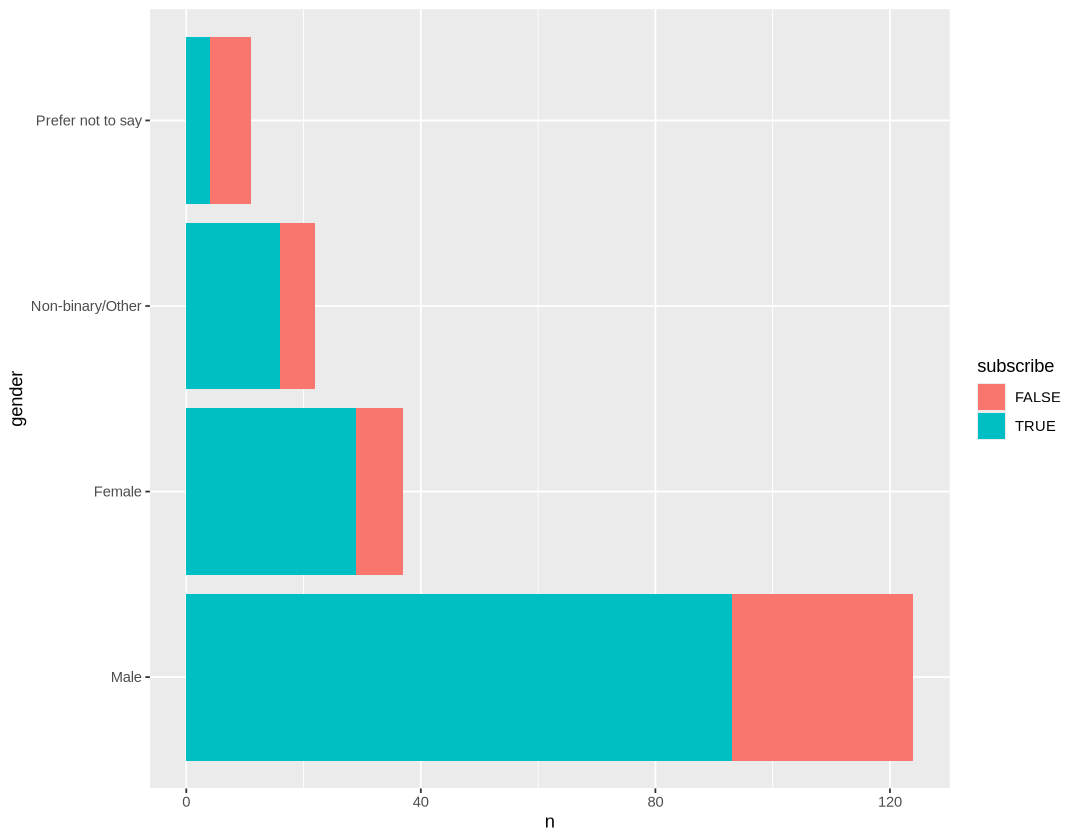

In [4]:
# RAW DATA summarize
count_sub_gen <- group_by(player_df, gender) |>
                    count(subscribe) |>
                    mutate(perc_sub = round( n / sum(n), 2))
gender_plot <- ggplot(count_sub_gen, aes(x = n, y = gender, fill = subscribe)) +
                    geom_bar(stat ="identity") 
                    
gender_plot

experience count percent_decimal
1 Pro        13    0.07           
2 Veteran    48    0.25           
3 Amateur    63    0.32           
4 Regular    35    0.18           
5 Beginner   35    0.18

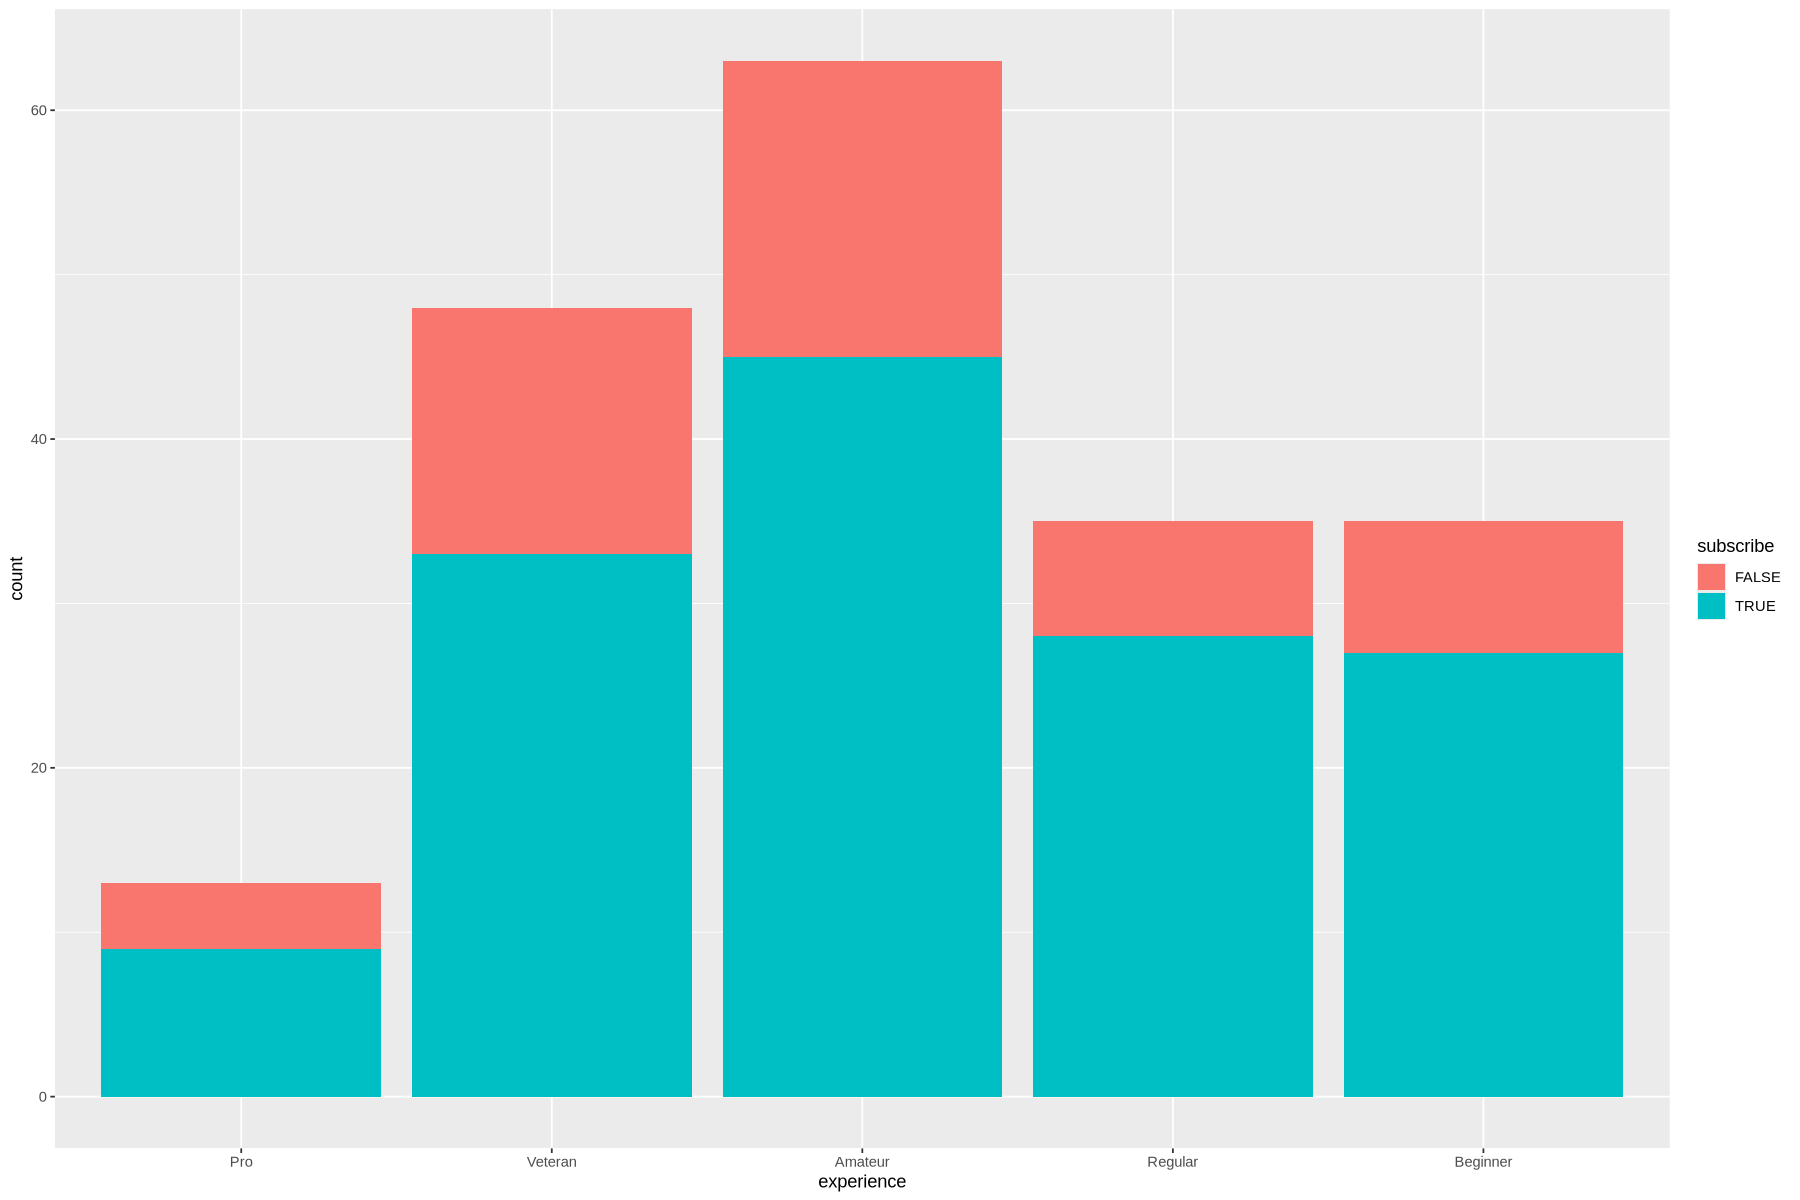

In [26]:
# experience explore
exp_plot <- ggplot(player_df, aes(x = experience, fill = subscribe)) +
            geom_bar()

exp_plot

ply_summarised_gender <- player_df |>
                        select(gender) |>
                        count(gender) |>
                        mutate(percent_decimal = round(n /sum(n), 2)) |>
                        rename(count = n)
ply_summarised_gender
ply_summarised_experience <- player_df |>
                        select(experience) |>
                        count(experience) |>
                        mutate(percent_decimal = round(n /sum(n), 2)) |>
                        rename(count = n)
ply_summarised_experience

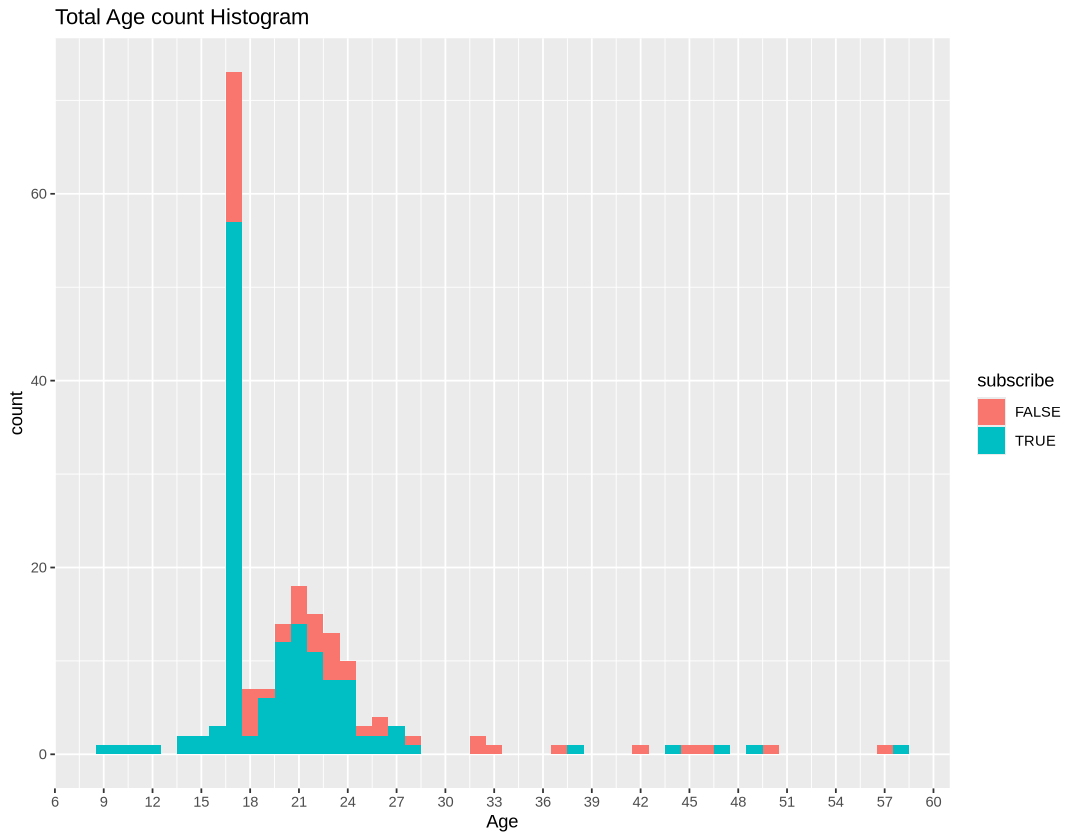

In [5]:
# VIEW AGES
# ALL AGES
histogram_age <- player_df |> 
            ggplot(aes(x = Age, fill = subscribe)) + 
            geom_histogram(binwidth = 1) +
            ggtitle("Total Age count Histogram") +
            scale_x_continuous(n.breaks = 20)
histogram_age


Warning message:
“Removed 18 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_bar()`).”


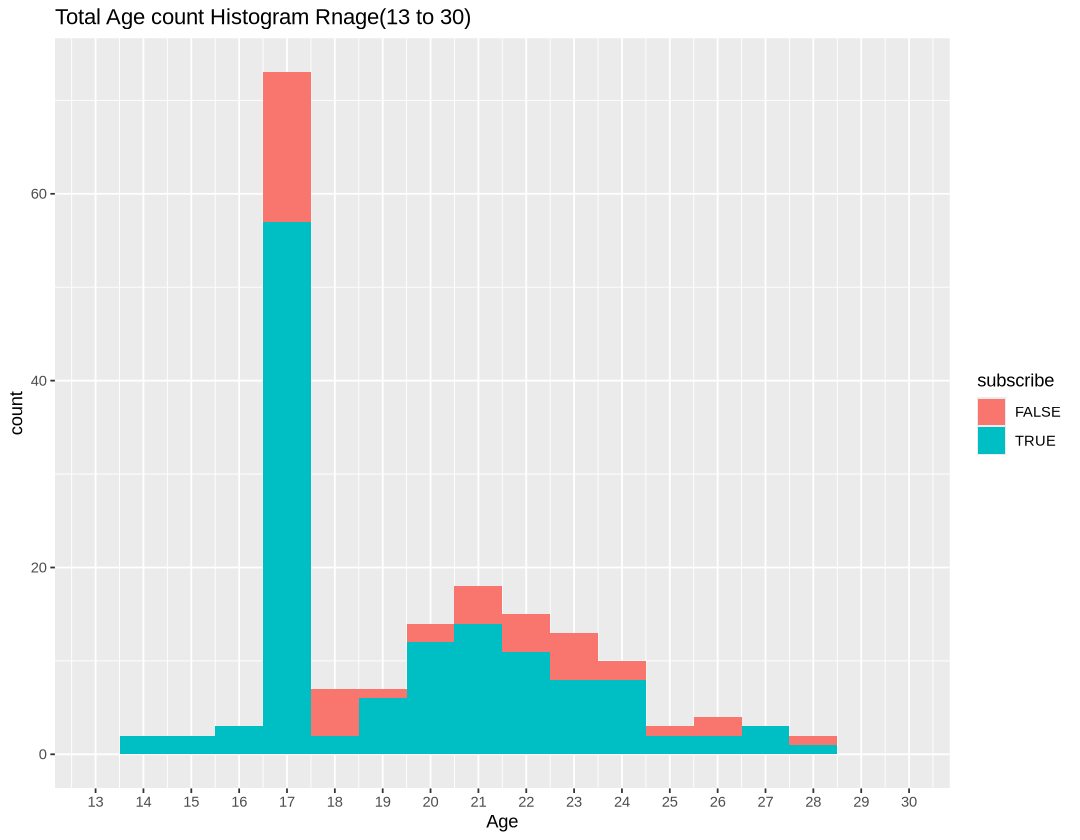

In [6]:
# Range from 13 to 30
histogram_age_ranged <- player_df |> 
            ggplot(aes(x = Age, fill = subscribe)) + 
            geom_histogram(binwidth = 1) +
            ggtitle("Total Age count Histogram Rnage(13 to 30)") +
            scale_x_continuous(n.breaks = 20, limits = c(13, 30))
histogram_age_ranged

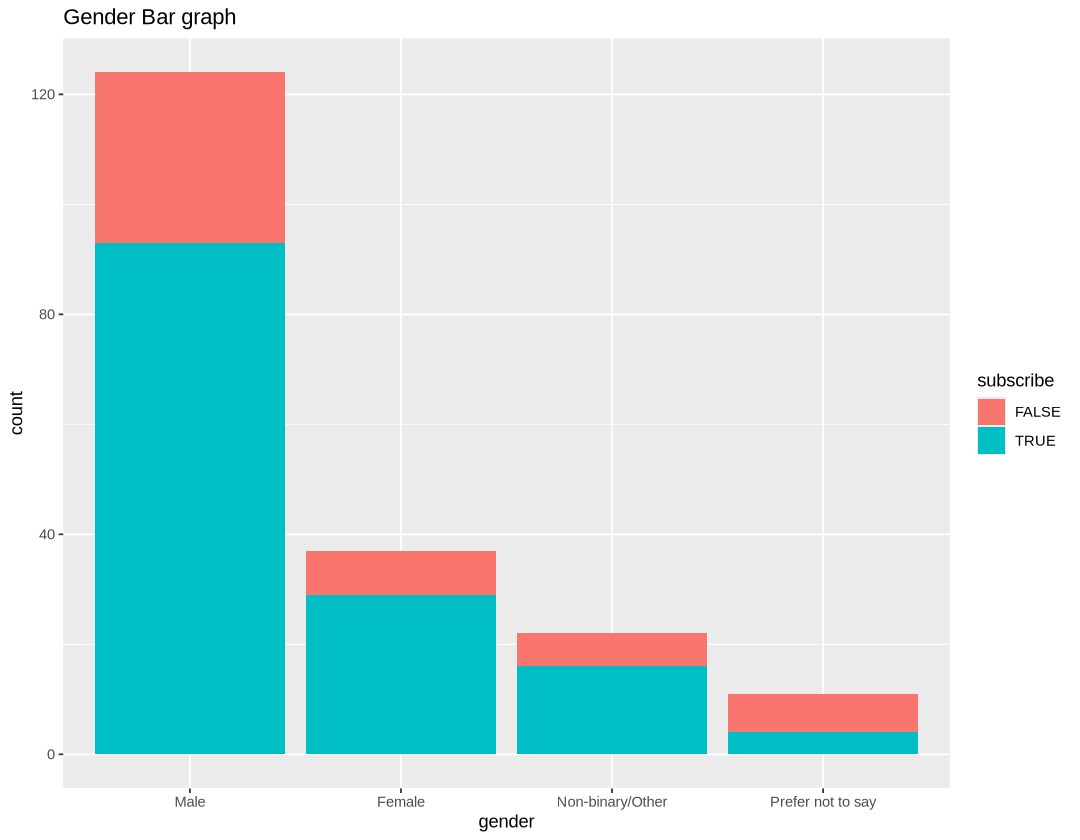

In [7]:
# VIEW GENDER 
bar_gender <- player_df |> 
            ggplot(aes(x = gender, fill = subscribe)) + 
            geom_bar() +
            ggtitle("Gender Bar graph")

bar_gender

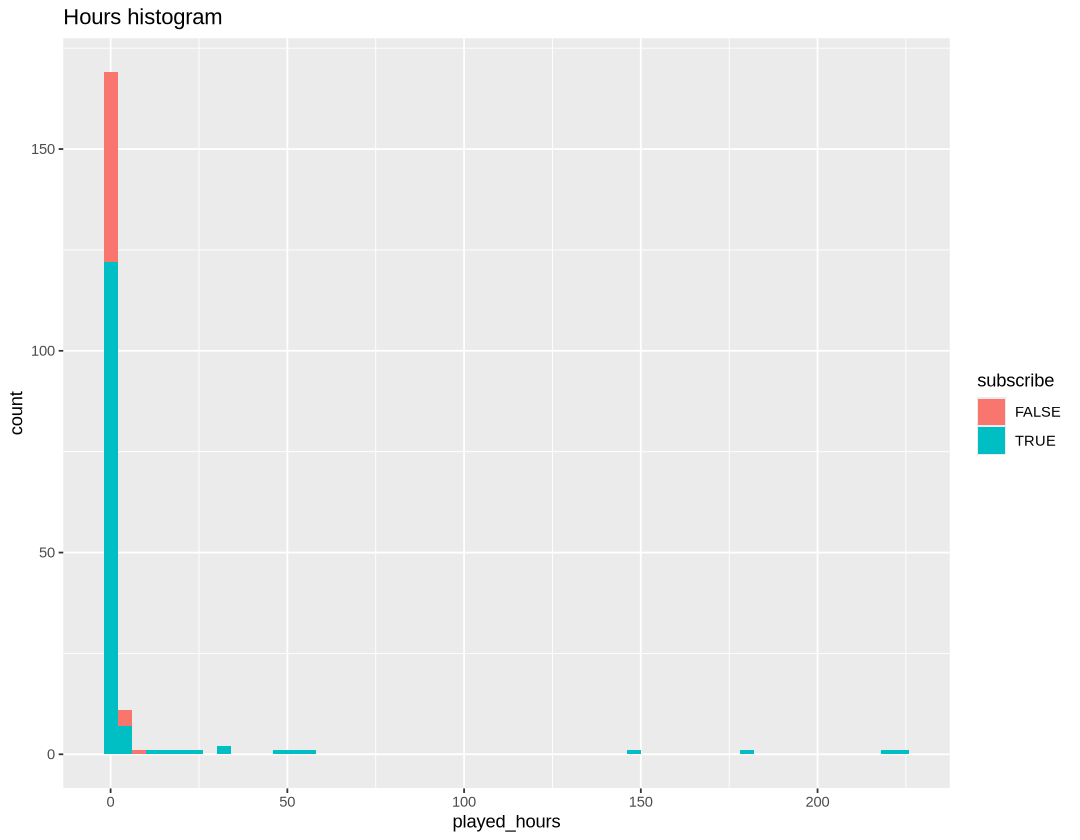

In [8]:
# VIEW HOURS
# ALL HOURS
histogram_hours <- player_df |> 
            ggplot(aes(x = played_hours, fill = subscribe)) + 
            geom_histogram(binwidth = 4) +
            ggtitle("Hours histogram") 
            # scale_x_continuous(n.breaks = 20, limits = c(13, 30))
histogram_hours

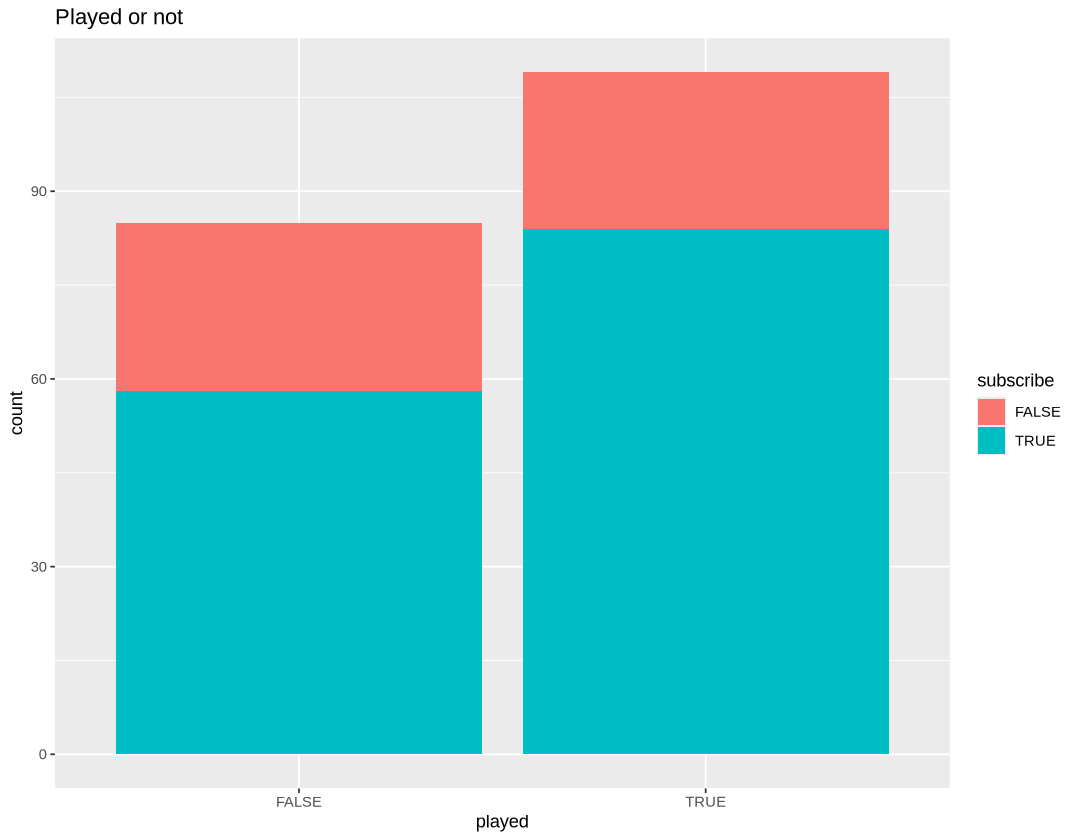

In [9]:
boolean_hours <- player_df |> 
            ggplot(aes(x = played, fill = subscribe)) + 
            geom_bar() +
            ggtitle("Played or not")
boolean_hours

Warning message:
“Removed 13 rows containing missing values or values outside the scale range
(`geom_point()`).”


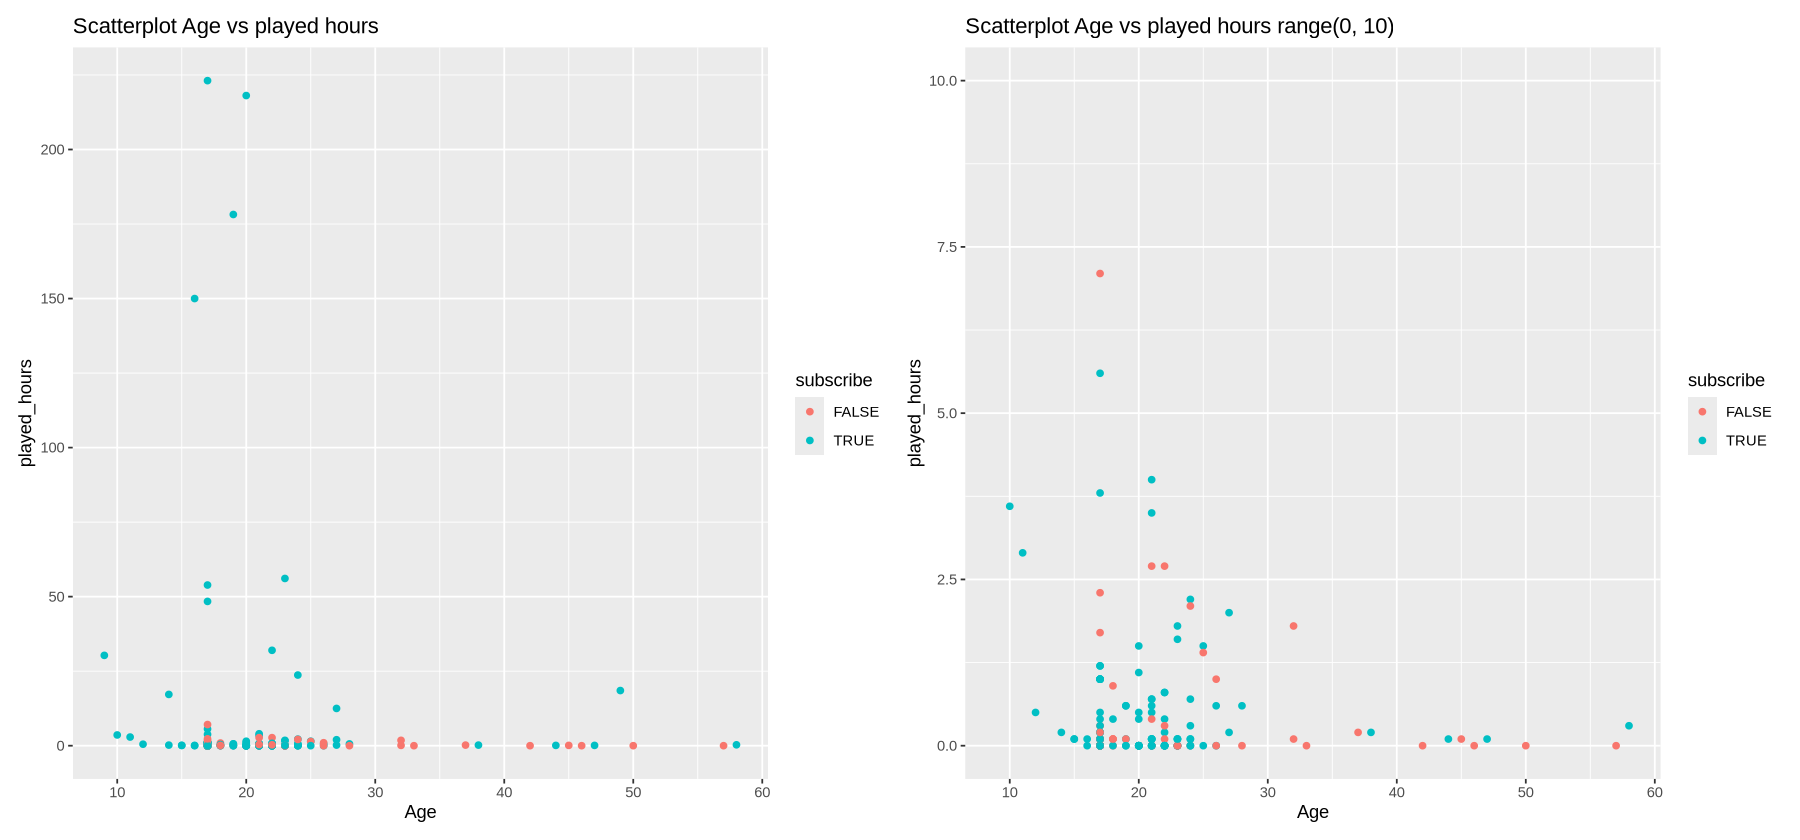

In [10]:
options(repr.plot.width = 15, repr.plot.height = 7, repr.matrix.max.rows = 7,readr.show_col_types = FALSE)

# SCATERPLOT Age Time played
scaterplot_AH <- player_df |> 
            ggplot(aes(x = Age, y = played_hours, colour = subscribe)) + 
            geom_point() +
            ggtitle("Scatterplot Age vs played hours")

scaterplot_AH_range <- player_df |> 
            ggplot(aes(x = Age, y = played_hours, colour = subscribe)) + 
            geom_point() +
            ggtitle("Scatterplot Age vs played hours range(0, 10)") + 
            ylim(c(0, 10))
scaterplot_AH + scaterplot_AH_range

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


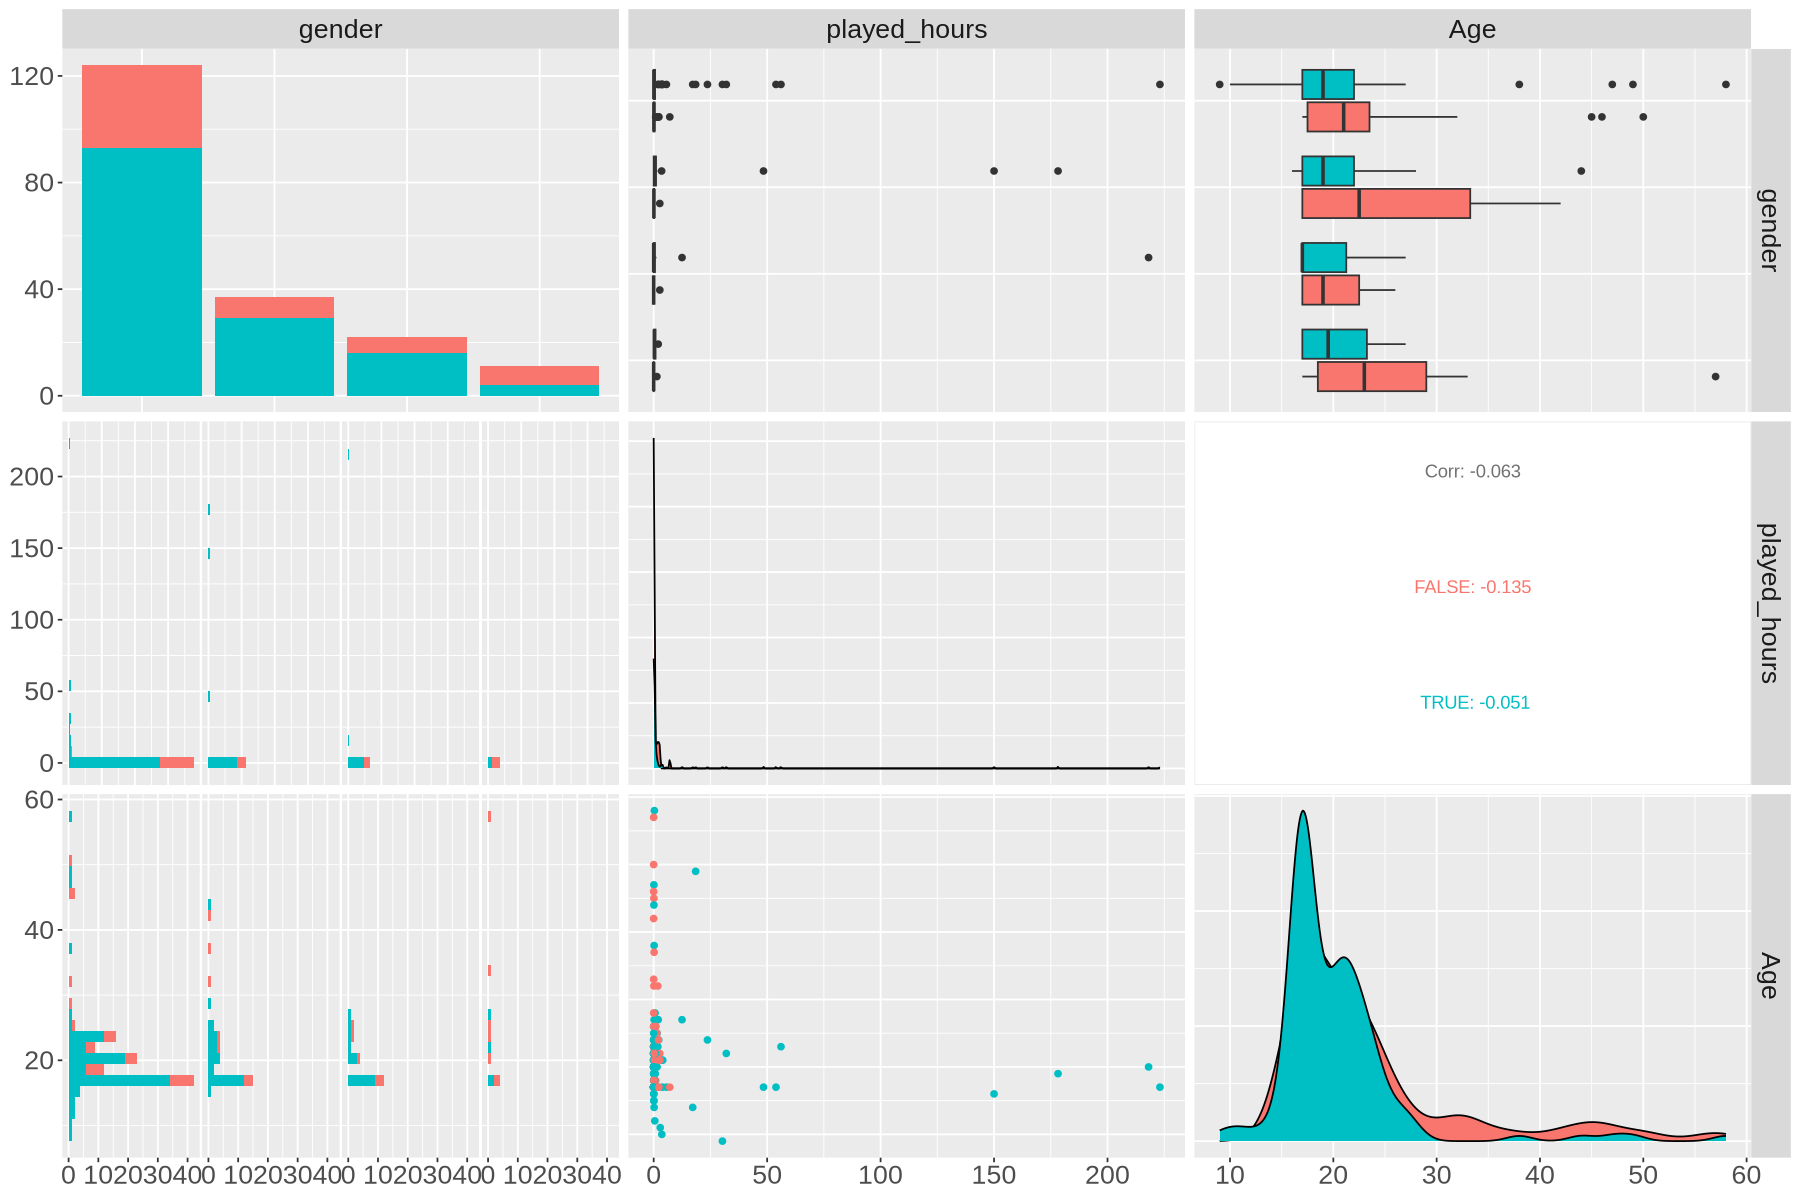

In [11]:
options(repr.plot.width = 15, repr.plot.height = 10)
pair_plot <- player_df |>
                ggpairs( columns = c("gender","played_hours",  "Age"),
                        mapping = aes(color = subscribe)) +
                theme(text = element_text(size = 20))

pair_plot

Warning message in warn_if_args_exist(list(...)):
“Extra arguments: 'columnsX', 'columnsY' are being ignored.  If these are meant to be aesthetics, submit them using the 'mapping' variable within ggpairs with ggplot2::aes or ggplot2::aes_string.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


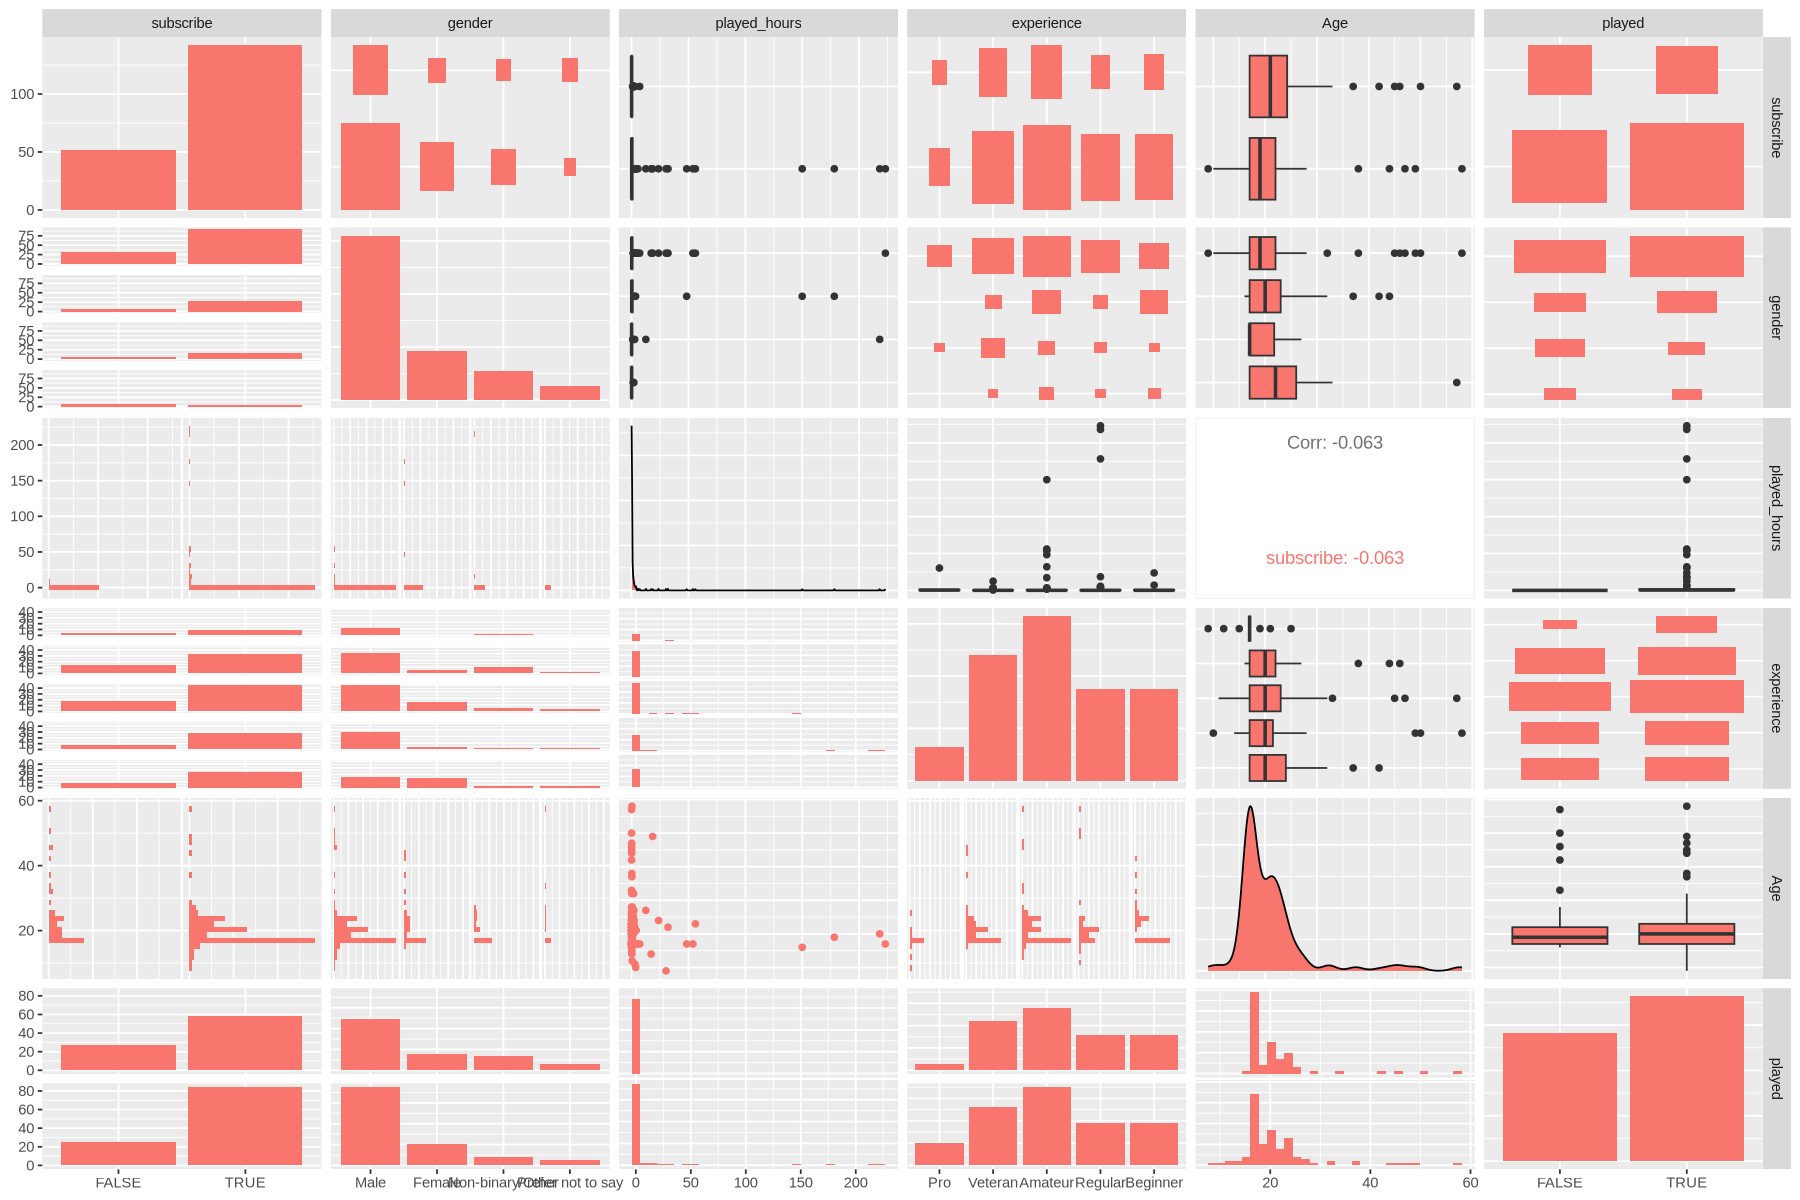

In [18]:
test_pair <- player_df |>
             ggpairs( columnsX = c("gender","played_hours",  "Age"),
                     columnsY = "subscribe",
                    mapping = aes(color="subscribe"))
                # theme(text = element_text(size = 20))
test_pair